<a href="https://colab.research.google.com/github/amathie5/projet-breast-cancer/blob/main/datascience_project_breastcancer_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [ ]:
#CSV files importation
df1 = pd.read_csv('https://raw.githubusercontent.com/amathie5/projet-breast-cancer/refs/heads/main/df1.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/amathie5/projet-breast-cancer/refs/heads/main/df2.csv')
df3 = pd.read_csv('https://raw.githubusercontent.com/amathie5/projet-breast-cancer/refs/heads/main/df3.csv')

#Concatening all dataframes together to be left with one unique dataframe
df = pd.concat([df1,df2,df3]).sort_values(by='year')
df_encoded = df.copy()

#Displaying the main informations of the dataframe
df.shape
display(df.head())
df.info()





,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count
20,2005,1,1,0,1,0,2,0,1,1,0,0,1
19,2005,1,1,0,0,9,4,0,1,9,9,9,1
18,2005,1,1,0,0,9,4,0,1,1,0,0,1
7,2005,1,1,0,0,4,2,0,1,1,0,0,1
6,2005,1,1,0,0,2,3,0,1,9,0,0,1


<class 'pandas.core.frame.DataFrame'>
Index: 1522340 entries, 20 to 411300
Data columns (total 13 columns):
 #   Column                 Non-Null Count    Dtype
---  ------                 --------------    -----
 0   year                   1522340 non-null  int64
 1   age_group_5_years      1522340 non-null  int64
 2   race_eth               1522340 non-null  int64
 3   first_degree_hx        1522340 non-null  int64
 4   age_menarche           1522340 non-null  int64
 5   age_first_birth        1522340 non-null  int64
 6   BIRADS_breast_density  1522340 non-null  int64
 7   current_hrt            1522340 non-null  int64
 8   menopaus               1522340 non-null  int64
 9   bmi_group              1522340 non-null  int64
 10  biophx                 1522340 non-null  int64
 11  breast_cancer_history  1522340 non-null  int64
 12  count                  1522340 non-null  int64
dtypes: int64(13)
memory usage: 162.6 MB


In [ ]:
age_map = {1:'18-29',2:'30-34',3:'35-39',4:'40-44',5:'45-49',6:'50-54',7:'55-59',8:'60-64',9:'65-69',10:'70-74',11:'75-79',12:'80-84',13:'85+'}
race_map = {1:'non-hispanic white', 2:'non-hispanic black', 3:'asian/pacific islander', 4:'native american',5:'hispanic',6:'other/mixed',9:'unknown'}
familyhx_map = {0:'no', 1:'yes', 9:'unknown'}
menarche_map = {0:'14+',1:'12-13',2:'<12',9:'unknown'}
firstbirth_map = {0:'<20',1:'20-24',2:'25-29',3:'30+',4:'nulliparous',9:'unknown'}
BIRADS_map = {1:'fatty',2:'scattered',3:'heterogeneously dense', 4:'extremely dense', 5:'unknown'}
hrt_map = {0:'no', 1:'yes',9:'unknown'}
menopaus_map = {1:'pre-menopausal',2:'post-menopausal',3:'surgical menopause', 9:'unknown'}
bmi_map = {1:'10-24.99',2:'25-29.99',3:'30-34.99',4:'35+',9:'unknown'}
biophx_map = {0:'no',1:'yes', 9:'unknown'}
history_map = {0:'no',1:'yes',9:'unknown'}

#Replacing the code with the categories
df['age_group_5_years']=df['age_group_5_years'].map(age_map)
df['race_eth']=df['race_eth'].map(race_map)
df['first_degree_hx']=df['first_degree_hx'].map(familyhx_map)
df['age_menarche']=df['age_menarche'].map(age_map)
df['age_first_birth']=df['age_first_birth'].map(firstbirth_map)
df['BIRADS_breast_density']=df['BIRADS_breast_density'].map(BIRADS_map)
df['current_hrt']=df['current_hrt'].map(hrt_map)
df['menopaus']=df['menopaus'].map(menopaus_map)
df['bmi_group']=df['bmi_group'].map(bmi_map)
df['biophx']=df['biophx'].map(biophx_map)
df['breast_cancer_history']=df['breast_cancer_history'].map(history_map)

#convert as category
cat_cols = ['age_group_5_years','race_eth','first_degree_hx','age_menarche','age_first_birth','BIRADS_breast_density','current_hrt','menopaus','bmi_group','biophx','breast_cancer_history']
df[cat_cols] = df[cat_cols].astype('category')
display(df.head())
df.info()




,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count
20,2005,18-29,non-hispanic white,no,18-29,<20,scattered,no,pre-menopausal,10-24.99,no,no,1
19,2005,18-29,non-hispanic white,no,NaN,unknown,extremely dense,no,pre-menopausal,unknown,unknown,unknown,1
18,2005,18-29,non-hispanic white,no,NaN,unknown,extremely dense,no,pre-menopausal,10-24.99,no,no,1
7,2005,18-29,non-hispanic white,no,NaN,nulliparous,scattered,no,pre-menopausal,10-24.99,no,no,1
6,2005,18-29,non-hispanic white,no,NaN,25-29,heterogeneously dense,no,pre-menopausal,unknown,no,no,1


<class 'pandas.core.frame.DataFrame'>
Index: 1522340 entries, 20 to 411300
Data columns (total 13 columns):
 #   Column                 Non-Null Count    Dtype   
---  ------                 --------------    -----   
 0   year                   1522340 non-null  int64   
 1   age_group_5_years      1522340 non-null  category
 2   race_eth               1522340 non-null  category
 3   first_degree_hx        1522340 non-null  category
 4   age_menarche           1265795 non-null  category
 5   age_first_birth        1522340 non-null  category
 6   BIRADS_breast_density  1343329 non-null  category
 7   current_hrt            1522340 non-null  category
 8   menopaus               1522340 non-null  category
 9   bmi_group              1522340 non-null  category
 10  biophx                 1522340 non-null  category
 11  breast_cancer_history  1522340 non-null  category
 12  count                  1522340 non-null  int64   
dtypes: category(11), int64(2)
memory usage: 50.8 MB


In [ ]:
#replace unknown values by nan
df = df.replace('unknown',np.nan)

#check for duplicates
print(df.duplicated().sum())

#the total number of observations should be 6'788'436
print(df['count'].sum())


/tmp/ipython-input-3569221684.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df = df.replace('unknown',np.nan)


0
6788436


In [ ]:
#create two binary variables for high BIRADS and cancer history
df['BIRADS_high']=np.where(df_encoded['BIRADS_breast_density'].isin([3,4]),1,0)
df['breast_cancer_history_bin']=np.where(df_encoded['breast_cancer_history']==1,1,0)

#check the distribution
display(df['BIRADS_high'])
display(df['breast_cancer_history_bin'])

display(df.head())

,BIRADS_high
20,0
19,1
18,1
7,0
6,1
...,...
411304,1
411303,1
411302,1
411301,1


,breast_cancer_history_bin
20,0
19,0
18,0
7,0
6,0
...,...
411304,0
411303,0
411302,0
411301,0


,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count,BIRADS_high,breast_cancer_history_bin
20,2005,18-29,non-hispanic white,no,18-29,<20,scattered,no,pre-menopausal,10-24.99,no,no,1,0,0
19,2005,18-29,non-hispanic white,no,NaN,NaN,extremely dense,no,pre-menopausal,NaN,NaN,NaN,1,1,0
18,2005,18-29,non-hispanic white,no,NaN,NaN,extremely dense,no,pre-menopausal,10-24.99,no,no,1,1,0
7,2005,18-29,non-hispanic white,no,NaN,nulliparous,scattered,no,pre-menopausal,10-24.99,no,no,1,0,0
6,2005,18-29,non-hispanic white,no,NaN,25-29,heterogeneously dense,no,pre-menopausal,NaN,no,no,1,1,0


In [ ]:
#check types and unique values
for col in cat_cols:
  print(col, ':',df[col].unique())

age_group_5_years : ['18-29', '85+', '30-34', '35-39', '40-44', ..., '60-64', '65-69', '70-74', '75-79', '80-84']
Length: 13
Categories (13, object): ['18-29', '30-34', '35-39', '40-44', ..., '70-74', '75-79', '80-84', '85+']
race_eth : ['non-hispanic white', NaN, 'non-hispanic black', 'asian/pacific islander', 'hispanic', 'native american', 'other/mixed']
Categories (6, object): ['asian/pacific islander', 'hispanic', 'native american', 'non-hispanic black',
                         'non-hispanic white', 'other/mixed']
first_degree_hx : ['no', NaN, 'yes']
Categories (2, object): ['no', 'yes']
age_menarche : ['18-29', NaN, '65-69', '30-34']
Categories (3, object): ['18-29', '30-34', '65-69']
age_first_birth : ['<20', NaN, 'nulliparous', '25-29', '20-24', '30+']
Categories (5, object): ['20-24', '25-29', '30+', '<20', 'nulliparous']
BIRADS_breast_density : ['scattered', 'extremely dense', 'heterogeneously dense', NaN, 'fatty']
Categories (4, object): ['extremely dense', 'fatty', 'heterog

In [ ]:
#save the cleaned dataset



In [ ]:
print (df)

        year age_group_5_years            race_eth first_degree_hx  \
20      2005             18-29  non-hispanic white              no   
19      2005             18-29  non-hispanic white              no   
18      2005             18-29  non-hispanic white              no   
7       2005             18-29  non-hispanic white              no   
6       2005             18-29  non-hispanic white              no   
...      ...               ...                 ...             ...   
411304  2017             18-29  non-hispanic white              no   
411303  2017             18-29  non-hispanic white              no   
411302  2017             18-29  non-hispanic white              no   
411301  2017             18-29  non-hispanic white              no   
411300  2017             18-29  non-hispanic white              no   

       age_menarche age_first_birth  BIRADS_breast_density current_hrt  \
20            18-29             <20              scattered          no   
19         

In [ ]:
df.to_csv('breast_cancer_clean.csv', index=False)

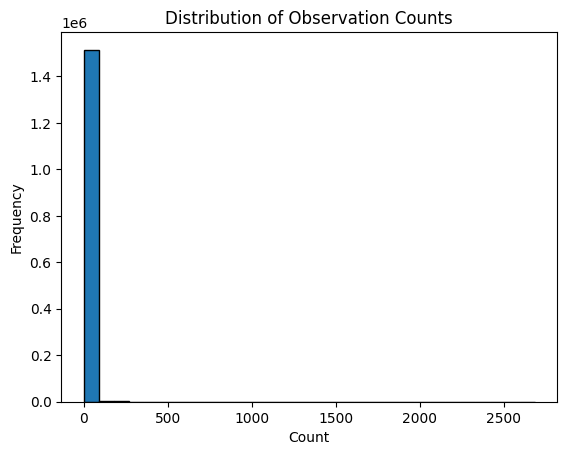

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df["count"], bins=30, edgecolor='black')
plt.title("Distribution of Observation Counts")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.show()